In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 10.6 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━

In [5]:
!pip install torch torchvision matplotlib


100%|██████████| 9.91M/9.91M [00:10<00:00, 908kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 121kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 543kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.6MB/s]
/home/akash/anaconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch [1/10], Loss: 0.9633, Accuracy: 69.33%
Epoch [2/10], Loss: 0.2177, Accuracy: 93.57%
Epoch [3/10], Loss: 0.1423, Accuracy: 95.70%
Epoch [4/10], Loss: 0.1073, Accuracy: 96.73%
Epoch [5/10], Loss: 0.0869, Accuracy: 97.35%
Epoch [6/10], Loss: 0.0747, Accuracy: 97.69%
Epoch [7/10], Loss: 0.0653, Accuracy: 97.99%
Epoch [8/10], Loss: 0.0589, Accuracy: 98.20%
Epoch [9/10], Loss: 0.0530, Accuracy: 98.34%
Epoch [10/10], Loss: 0.0478, Accuracy: 98.50%


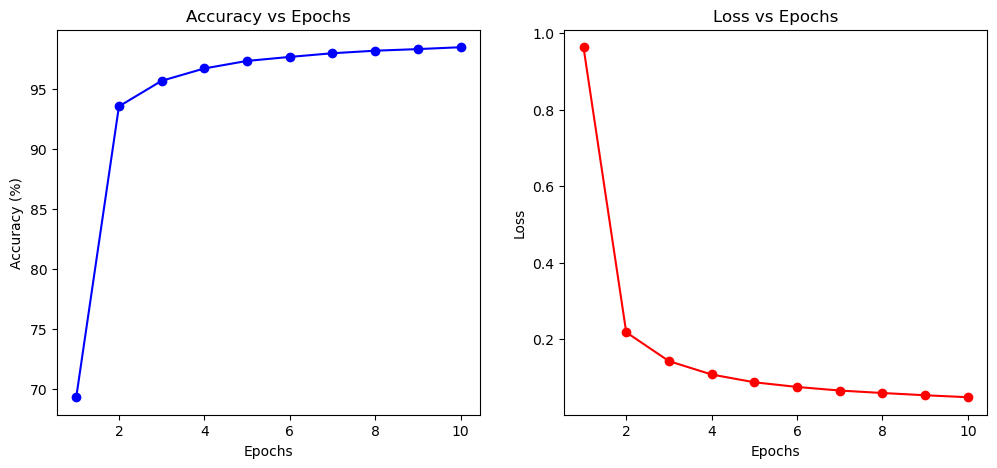

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = self.pool(x)
        x = torch.sigmoid(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)  # No activation, because CrossEntropyLoss applies softmax
        return x

# Data Preprocessing and Loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize Model, Loss Function, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
num_epochs = 10
train_losses = []
train_accuracies = []

def train():
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

train()

# Plot Accuracy vs. Epochs and Loss vs. Epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

plt.show()


Epoch [1/10], Loss: 0.9616, Accuracy: 69.13%
Epoch [2/10], Loss: 0.1766, Accuracy: 94.85%
Epoch [3/10], Loss: 0.1128, Accuracy: 96.66%
Epoch [4/10], Loss: 0.0868, Accuracy: 97.37%
Epoch [5/10], Loss: 0.0735, Accuracy: 97.81%
Epoch [6/10], Loss: 0.0630, Accuracy: 98.05%
Epoch [7/10], Loss: 0.0556, Accuracy: 98.32%
Epoch [8/10], Loss: 0.0510, Accuracy: 98.42%
Epoch [9/10], Loss: 0.0469, Accuracy: 98.52%
Epoch [10/10], Loss: 0.0423, Accuracy: 98.65%


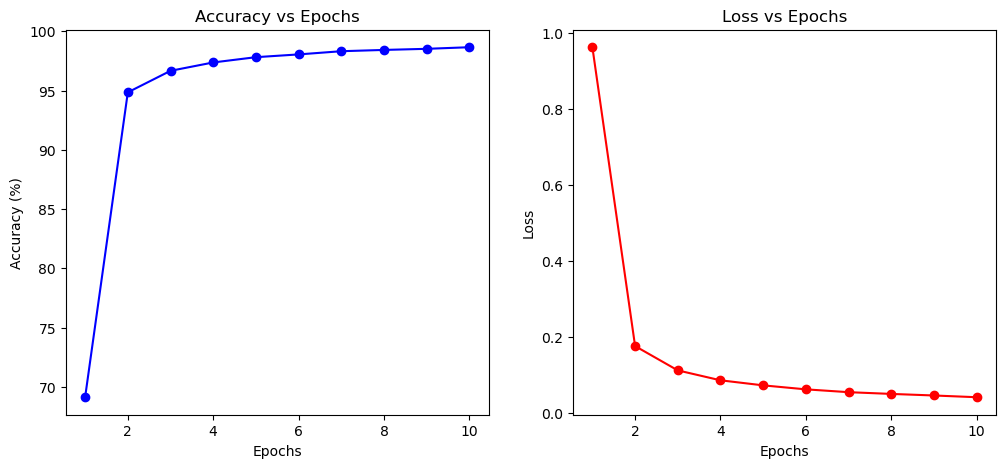

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = self.pool(x)
        x = torch.sigmoid(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)  # No activation, because CrossEntropyLoss applies softmax
        return x

# Data Preprocessing and Loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize Model, Loss Function, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
num_epochs = 10
train_losses = []
train_accuracies = []

def train():
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

train()

# Plot Accuracy vs. Epochs and Loss vs. Epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

plt.show()


In [1]:
# final 

Epoch 1/10, Loss: 1.3630, Accuracy: 74.53%
Epoch 2/10, Loss: 0.8922, Accuracy: 93.91%
Epoch 3/10, Loss: 0.8097, Accuracy: 96.03%
Epoch 4/10, Loss: 0.7727, Accuracy: 96.96%
Epoch 5/10, Loss: 0.7512, Accuracy: 97.50%
Epoch 6/10, Loss: 0.7377, Accuracy: 97.89%
Epoch 7/10, Loss: 0.7274, Accuracy: 98.11%
Epoch 8/10, Loss: 0.7199, Accuracy: 98.31%
Epoch 9/10, Loss: 0.7144, Accuracy: 98.47%
Epoch 10/10, Loss: 0.7104, Accuracy: 98.61%


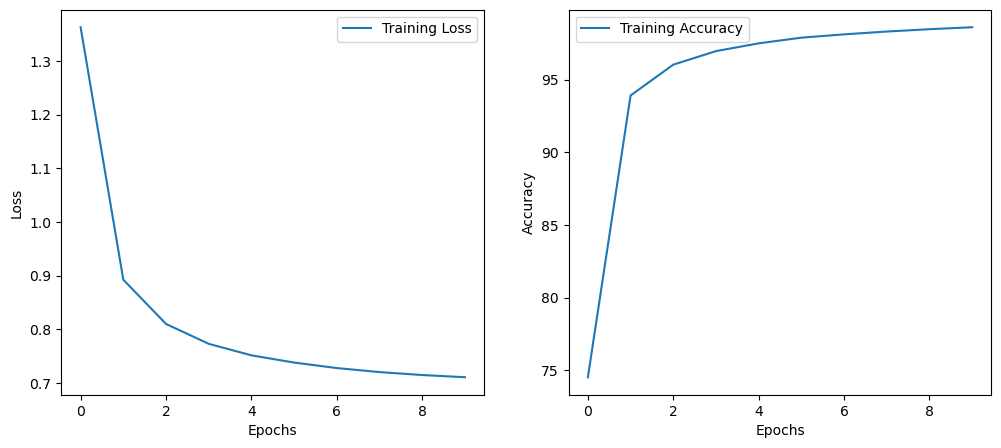

In [8]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
import torchvision  
import torchvision.transforms as transforms  
import matplotlib.pyplot as plt  

# Set device  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

# Load MNIST dataset  
transform = transforms.Compose([  
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]  
])  
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)  
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)  

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)  
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)  

# Define layers  
conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 32*32, Output: 24x24   
# conv3 = nn.Conv2d(16, 120, kernel_size=5).to(device) # Input: 4x4, Output: 1x1  
pool1 = nn.AvgPool2d(kernel_size=2, stride=2).to(device)  # Average pooling  

conv2 = nn.Conv2d(6, 16, kernel_size=5).to(device)  # Input: 12x12, Output: 8x8 
pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

fc1 = nn.Linear(16 * 5 * 5, 120).to(device)
fc2 = nn.Linear(120, 84).to(device)
fc3 = nn.Linear(84, 10).to(device)

# self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        # self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        # self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)

# Define loss and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(list(conv1.parameters()) + list(conv2.parameters()) + list(conv3.parameters()) +  
                       list(fc1.parameters()) + list(fc2.parameters()), lr=0.001)  

# Training loop  
num_epochs = 10  
train_loss, train_acc = [], []  

for epoch in range(num_epochs):  
    running_loss, correct, total = 0.0, 0, 0  
    for inputs, labels in train_loader:  
        inputs, labels = inputs.to(device), labels.to(device)  
        
        # Forward pass  
        x = pool1(torch.sigmoid(conv1(inputs)))  # First layer  
        x = pool2(torch.sigmoid(conv2(x)))       # Second layer  
        # x = torch.relu(conv3(x))                 # Third layer  
        x = x.view(-1, 16 * 5 * 5)                      # Flatten  
        x = torch.sigmoid(fc1(x))
        x = torch.sigmoid(fc2(x))
        outputs = fc3(x)  # No activation, because CrossEntropyLoss applies softmax                        # Output layer  
        
        # Compute loss  
        loss = criterion(outputs, labels)  
        optimizer.zero_grad()                     # Zero gradients  
        loss.backward()                           # Backpropagation  
        optimizer.step()                          # Update parameters  

        # Collect metrics  
        running_loss += loss.item()  
        _, predicted = torch.max(outputs.data, 1)  
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()  

    # Store epoch metrics  
    train_loss.append(running_loss / len(train_loader))  
    train_acc.append(100 * correct / total)  
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.2f}%")  

# Plot accuracy and loss  
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)  
plt.plot(range(num_epochs), train_loss, label="Training Loss")  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend()  
plt.subplot(1, 2, 2)  
plt.plot(range(num_epochs), train_acc, label="Training Accuracy")  
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")  
plt.legend()  
plt.show()

Epoch 1/20, Loss: 1.2648, Accuracy: 77.24%
Epoch 2/20, Loss: 0.8318, Accuracy: 94.02%
Epoch 3/20, Loss: 0.7605, Accuracy: 95.80%
Epoch 4/20, Loss: 0.7272, Accuracy: 96.73%
Epoch 5/20, Loss: 0.7070, Accuracy: 97.30%
Epoch 6/20, Loss: 0.6923, Accuracy: 97.65%
Epoch 7/20, Loss: 0.6825, Accuracy: 97.89%
Epoch 8/20, Loss: 0.6750, Accuracy: 98.13%
Epoch 9/20, Loss: 0.6693, Accuracy: 98.29%
Epoch 10/20, Loss: 0.6618, Accuracy: 98.41%
Epoch 11/20, Loss: 0.6583, Accuracy: 98.53%
Epoch 12/20, Loss: 0.6553, Accuracy: 98.62%
Epoch 13/20, Loss: 0.6514, Accuracy: 98.71%
Epoch 14/20, Loss: 0.6486, Accuracy: 98.79%
Epoch 15/20, Loss: 0.6467, Accuracy: 98.88%
Epoch 16/20, Loss: 0.6451, Accuracy: 98.94%
Epoch 17/20, Loss: 0.6433, Accuracy: 99.00%
Epoch 18/20, Loss: 0.6419, Accuracy: 99.03%
Epoch 19/20, Loss: 0.6409, Accuracy: 99.09%
Epoch 20/20, Loss: 0.6397, Accuracy: 99.12%


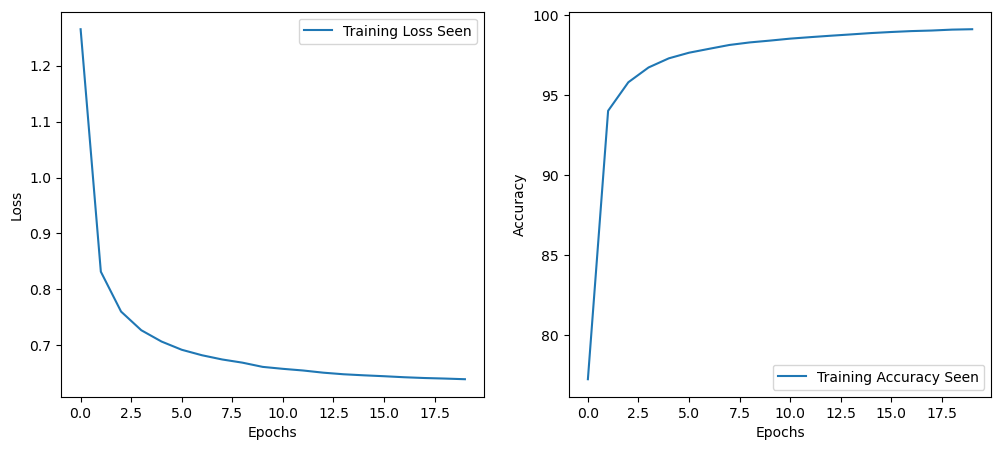

In [ ]:

"""
@author: Akash Maji
@email: akashmaji@iisc.ac.in
@reference: https://pytorch.org/docs/stable/nn.html#
"""

# import necessary pytorch library
import torch  
import torch.nn as nn  
import torch.optim as optim  
import torchvision  
import torchvision.transforms as transforms  
import matplotlib.pyplot as plt  

# Set device  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

 
transform = transforms.Compose([  
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]  
])  

# Load MNIST dataset 

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)  
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)  

training_loaded_data = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)  
test_loaded_data = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)  

# Define layers  
convolution_layer_1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 32*32, Output: 24x24    
pooling_1 = nn.AvgPool2d(kernel_size=2, stride=2).to(device)  # Average pooling  

convolution_layer_2 = nn.Conv2d(6, 16, kernel_size=5).to(device)  # Input: 12x12, Output: 8x8 
pooling_2 = nn.AvgPool2d(kernel_size=2, stride=2)  # Average pooling  

fully_connected_layer_1 = nn.Linear(16 * 5 * 5, 120).to(device)
fully_connected_layer_2 = nn.Linear(120, 84).to(device)
fully_connected_layer_3 = nn.Linear(84, 10).to(device)


# Define loss and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(list(convolution_layer_1.parameters()) + list(convolution_layer_2.parameters()) +  
                       list(fully_connected_layer_1.parameters()) + list(fully_connected_layer_2.parameters()), lr=0.001)  

# Training loop  
num_epochs = 20
training_loss, training_accuracy = [], []  

for epoch in range(num_epochs):  
    running_loss, correct, total = 0.0, 0, 0  
    for inputs, labels in training_loaded_data:  
        inputs, labels = inputs.to(device), labels.to(device)  
        
        # Forward pass  
        x = pooling_1(torch.sigmoid(convolution_layer_1(inputs)))  # First layer  
        x = pooling_2(torch.sigmoid(convolution_layer_2(x)))       # Second layer  
        # x = torch.relu(convolution_layer_3(x))                 # Third layer  
        x = x.view(-1, 16 * 5 * 5)                      # Flatten  
        x = torch.sigmoid(fully_connected_layer_1(x))
        x = torch.sigmoid(fully_connected_layer_2(x))
        outputs = fully_connected_layer_3(x)  # No activation, because CrossEntropyLoss applies softmax                        # Output layer  
        
        # Compute loss  
        loss = criterion(outputs, labels)  
        optimizer.zero_grad()                     # Zero gradients  
        loss.backward()                           # Backpropagation  
        optimizer.step()                          # Update parameters  

        # Collect metrics  
        running_loss += loss.item()  
        _, predicted = torch.max(outputs.data, 1)  
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()  

    # Store epoch metrics  
    training_loss.append(running_loss / len(training_loaded_data))  
    training_accuracy.append(100 * correct / total)  
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {training_accuracy[-1]:.2f}%")  

# Plot accuracy and loss  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
plt.plot(range(num_epochs), training_loss, label="Training Loss Seen", marker='o', linestyle='-', color='b')
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend()  

plt.subplot(1, 2, 2)  
plt.plot(range(num_epochs), training_accuracy, label="Training Accuracy Seen", marker='o', linestyle='-', color='r') 
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")  
plt.legend()  
plt.show()

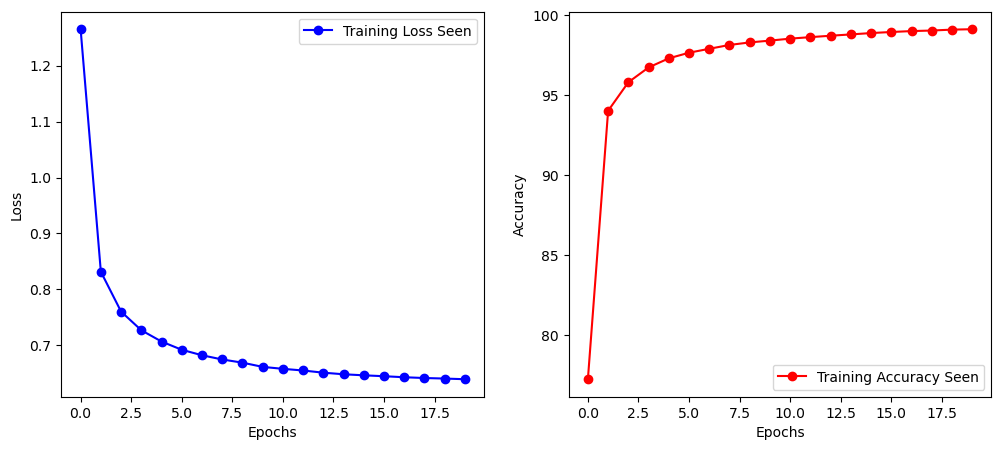

In [13]:
# Plot accuracy and loss  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
plt.plot(range(num_epochs), training_loss, label="Training Loss Seen", marker='o', linestyle='-', color='b')
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend()  

plt.subplot(1, 2, 2)  
plt.plot(range(num_epochs), training_accuracy, label="Training Accuracy Seen", marker='o', linestyle='-', color='r') 
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")  
plt.legend()  
plt.show()

Epoch 1/20, Loss: 1.4346, Accuracy: 68.74%
Epoch 2/20, Loss: 0.9708, Accuracy: 90.23%
Epoch 3/20, Loss: 0.8969, Accuracy: 92.41%
Epoch 4/20, Loss: 0.8516, Accuracy: 93.91%
Epoch 5/20, Loss: 0.8163, Accuracy: 95.02%
Epoch 6/20, Loss: 0.7903, Accuracy: 95.72%
Epoch 7/20, Loss: 0.7693, Accuracy: 96.34%
Epoch 8/20, Loss: 0.7565, Accuracy: 96.74%
Epoch 9/20, Loss: 0.7467, Accuracy: 97.08%
Epoch 10/20, Loss: 0.7394, Accuracy: 97.33%
Epoch 11/20, Loss: 0.7331, Accuracy: 97.57%
Epoch 12/20, Loss: 0.7275, Accuracy: 97.73%
Epoch 13/20, Loss: 0.7211, Accuracy: 97.94%
Epoch 14/20, Loss: 0.7174, Accuracy: 98.03%
Epoch 15/20, Loss: 0.7137, Accuracy: 98.17%
Epoch 16/20, Loss: 0.7113, Accuracy: 98.22%
Epoch 17/20, Loss: 0.7087, Accuracy: 98.38%
Epoch 18/20, Loss: 0.7068, Accuracy: 98.43%
Epoch 19/20, Loss: 0.7045, Accuracy: 98.51%
Epoch 20/20, Loss: 0.7029, Accuracy: 98.61%


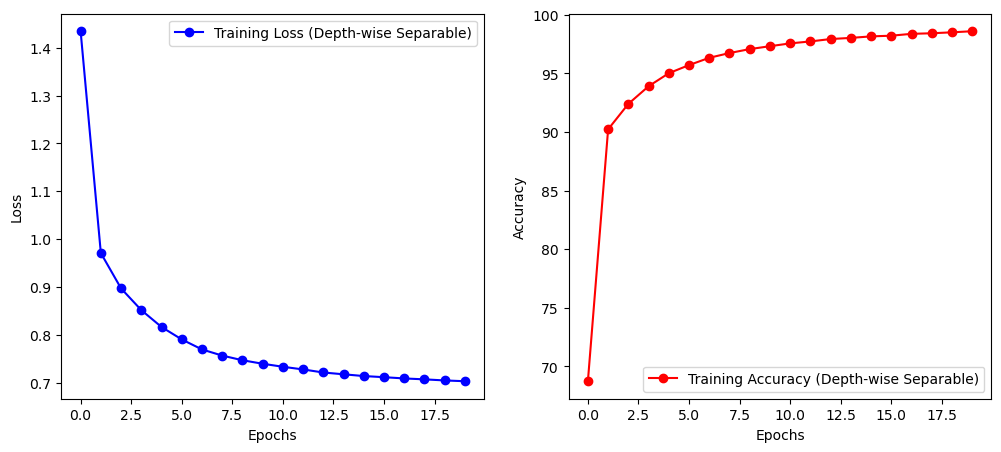

In [14]:

"""
@author: Akash Maji
@email: akashmaji@iisc.ac.in
@reference: https://pytorch.org/docs/stable/nn.html#
"""

# import necessary libraries
import torch  
import torch.nn as nn  
import torch.optim as optim  
import torchvision  
import torchvision.transforms as transforms  
import matplotlib.pyplot as plt  

# Set device  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

# Define depth-wise separable convolution function  
def depthwise_separable_conv(in_channels, out_channels, kernel_size, stride=1, padding=0):  
    return nn.Sequential(  
        nn.Conv2d(in_channels, in_channels, kernel_size, stride, padding, groups=in_channels),  # Depthwise  
        nn.Conv2d(in_channels, out_channels, kernel_size=1)  # Pointwise  
    )  

# Load MNIST dataset  
transform = transforms.Compose([  
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]  
])  

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)  
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)  

training_loaded_data = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)  
test_loaded_data = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)  

# Define layers with depth-wise separable convolutions  
convolution_layer_1 = depthwise_separable_conv(1, 6, kernel_size=5, padding=2).to(device)  # Input: 28x28, Output: 24x24  
pooling_1 = nn.AvgPool2d(kernel_size=2, stride=2).to(device)  # Average pooling  

convolution_layer_2 = depthwise_separable_conv(6, 16, kernel_size=5).to(device)  # Input: 12x12, Output: 8x8  
pooling_2 = nn.AvgPool2d(kernel_size=2, stride=2).to(device)  # Average pooling  

fully_connected_layer_1 = nn.Linear(16 * 5 * 5, 120).to(device)  
fully_connected_layer_2 = nn.Linear(120, 84).to(device)  
fully_connected_layer_3 = nn.Linear(84, 10).to(device)  

# Define loss and optimizer  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(list(convolution_layer_1.parameters()) + list(convolution_layer_2.parameters()) +  
                       list(fully_connected_layer_1.parameters()) + list(fully_connected_layer_2.parameters()), lr=0.001)  

# Training loop  
num_epochs = 20  
training_loss, training_accuracy = [], []  

for epoch in range(num_epochs):  
    running_loss, correct, total = 0.0, 0, 0  
    for inputs, labels in training_loaded_data:  
        inputs, labels = inputs.to(device), labels.to(device)  

        # Forward pass  
        x = pooling_1(torch.sigmoid(convolution_layer_1(inputs)))  # First layer  
        x = pooling_2(torch.sigmoid(convolution_layer_2(x)))       # Second layer  
        x = x.view(-1, 16 * 5 * 5)                                # Flatten  
        x = torch.sigmoid(fully_connected_layer_1(x))             # Fully connected layer 1  
        x = torch.sigmoid(fully_connected_layer_2(x))             # Fully connected layer 2  
        outputs = fully_connected_layer_3(x)                      # Output layer  

        # Compute loss  
        loss = criterion(outputs, labels)  
        optimizer.zero_grad()                                     # Zero gradients  
        loss.backward()                                           # Backpropagation  
        optimizer.step()                                          # Update parameters  

        # Collect metrics  
        running_loss += loss.item()  
        _, predicted = torch.max(outputs.data, 1)  
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()  

    # Store epoch metrics  
    training_loss.append(running_loss / len(training_loaded_data))  
    training_accuracy.append(100 * correct / total)  
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {training_accuracy[-1]:.2f}%")  

# Plot accuracy and loss  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
plt.plot(range(num_epochs), training_loss, label="Training Loss (Depth-wise Separable)", marker='o', linestyle='-', color='b')  
plt.xlabel("Epochs")  
plt.ylabel("Loss")  
plt.legend()  

plt.subplot(1, 2, 2)  
plt.plot(range(num_epochs), training_accuracy, label="Training Accuracy (Depth-wise Separable)", marker='o', linestyle='-', color='r')  
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")  
plt.legend()  
plt.show()